In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

# Data exploration and cleaning

In [2]:
data = pd.read_csv("../../ml4-data/stackoverflow.csv")
data = data.dropna()
data.shape

(6991, 22)

In [3]:
data.head()

,Respondent,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data scientist,...,Developer with stats/math background,DevOps,Embedded developer,Graphic designer,Graphics programming,Machine learning specialist,Mobile developer,Quality assurance engineer,Systems administrator,Web developer
0,3,United Kingdom,113750.0,20,True,True,10000.0,Not remote,8,False,...,False,False,False,False,False,False,False,False,False,False
1,15,United Kingdom,100000.0,20,False,True,5000.0,Remote,8,False,...,False,False,True,False,False,False,False,False,False,False
2,18,United States,130000.0,20,True,True,1000.0,Remote,9,False,...,False,True,True,False,False,False,False,True,False,True
3,19,United States,82500.0,3,False,True,10000.0,Not remote,5,False,...,False,False,False,False,False,False,False,False,False,True
4,26,United States,175000.0,16,False,True,10000.0,Not remote,7,False,...,False,False,False,False,False,False,False,False,False,True


In [18]:
list(data)

['Respondent',
 'Country',
 'Salary',
 'YearsCodedJob',
 'OpenSource',
 'Hobby',
 'CompanySizeNumber',
 'Remote',
 'CareerSatisfaction',
 'Data scientist',
 'Database administrator',
 'Desktop applications developer',
 'Developer with stats/math background',
 'DevOps',
 'Embedded developer',
 'Graphic designer',
 'Graphics programming',
 'Machine learning specialist',
 'Mobile developer',
 'Quality assurance engineer',
 'Systems administrator',
 'Web developer']

In [4]:
data = data.drop(['Respondent', 'Country'], 1)

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [6]:
nominal = ['OpenSource',
 'Hobby',
 'Remote',
 'Data scientist',
 'Database administrator',
 'Desktop applications developer',
 'Developer with stats/math background',
 'DevOps',
 'Embedded developer',
 'Graphic designer',
 'Graphics programming',
 'Machine learning specialist',
 'Mobile developer',
 'Quality assurance engineer',
 'Systems administrator',
 'Web developer']

In [7]:
data_bin = MultiColumnLabelEncoder(columns = nominal).fit_transform(data)
data_bin.head()

,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data scientist,Database administrator,Desktop applications developer,Developer with stats/math background,DevOps,Embedded developer,Graphic designer,Graphics programming,Machine learning specialist,Mobile developer,Quality assurance engineer,Systems administrator,Web developer
0,113750.0,20,1,1,10000.0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100000.0,20,0,1,5000.0,1,8,0,0,0,0,0,1,0,0,0,0,0,0,0
2,130000.0,20,1,1,1000.0,1,9,0,0,0,0,1,1,0,0,0,0,1,0,1
3,82500.0,3,0,1,10000.0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1
4,175000.0,16,0,1,10000.0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
data['Remote'].value_counts()

Not remote    6273
Remote         718
Name: Remote, dtype: int64

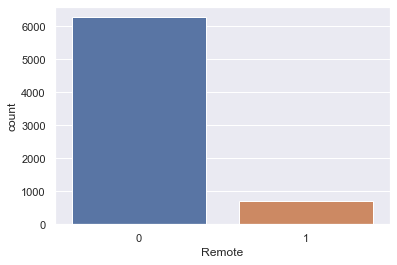

In [12]:
sns.countplot(x='Remote', data=data_bin)
plt.show()

In [9]:
X = data_bin.drop('Remote', 1)
y = data_bin['Remote']

In [10]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.333300
         Iterations 7
                                   Results: Logit
Model:                     Logit                   Pseudo R-squared:        -0.007   
Dependent Variable:        Remote                  AIC:                     4698.1984
Date:                      2020-04-08 16:55        BIC:                     4828.3936
No. Observations:          6991                    Log-Likelihood:          -2330.1  
Df Model:                  18                      LL-Null:                 -2313.9  
Df Residuals:              6972                    LLR p-value:             1.0000   
Converged:                 1.0000                  Scale:                   1.0000   
No. Iterations:            7.0000                                                    
-------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    z     P>|z|   [0.

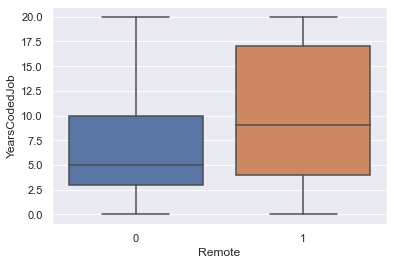

In [13]:
sns.boxplot(x="Remote", y="YearsCodedJob", data=data_bin)

# Oversampling

In [15]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=0)
columns = X_train.columns

In [18]:
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Remote'])

print("Length of oversampled data is ",len(os_data_X))
print("Number of non-remote devs in oversampled data",len(os_data_y[os_data_y['Remote']==0]))
print("Number of remote devs",len(os_data_y[os_data_y['Remote']==1]))
print("Proportion of non-remote devs in oversampled data is ",len(os_data_y[os_data_y['Remote']==0])/len(os_data_X))
print("Proportion of remote devs in oversampled data is ",len(os_data_y[os_data_y['Remote']==1])/len(os_data_X))

Length of oversampled data is  8824
Number of non-remote devs in oversampled data 4412
Number of remote devs 4412
Proportion of non-remote devs in oversampled data is  0.5
Proportion of remote devs in oversampled data is  0.5


In [19]:
X = os_data_X
y = os_data_y
X

,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,CareerSatisfaction,Data scientist,Database administrator,Desktop applications developer,Developer with stats/math background,DevOps,Embedded developer,Graphic designer,Graphics programming,Machine learning specialist,Mobile developer,Quality assurance engineer,Systems administrator,Web developer
0,27500.000000,2,0,1,20.000000,10,0,1,0,1,0,0,0,0,0,0,0,1,1
1,138000.000000,16,1,1,100.000000,8,0,0,1,0,0,1,0,0,0,0,0,0,1
2,4000.000000,3,0,1,1.000000,7,1,0,0,1,0,0,0,0,0,0,0,0,1
3,31250.000000,2,0,1,10.000000,10,0,0,0,0,0,0,0,0,0,0,0,0,1
4,105000.000000,6,0,1,10.000000,5,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8819,115000.000000,12,0,1,1.500625,9,0,0,0,0,1,0,0,0,0,0,0,0,1
8820,50000.000000,4,0,0,1.000000,8,0,0,0,0,0,0,0,0,0,0,0,0,0
8821,37666.454072,2,0,0,10.000000,8,0,0,0,0,0,0,0,0,0,0,0,0,1
8822,55245.110351,5,0,1,11.644792,8,0,0,0,0,0,0,0,0,0,0,0,0,1


# Implementing and testing the model

In [20]:
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X, y.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = logreg.predict(X_test)

# Metrics

## Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1209  652]
 [  85  152]]


## Classification report

* Precisão: Habilidade de não classificar um sample como positivo se ele for negativo
* Recall: Habilidade de encontrar todos os samples positivos
* F-beta score: Média ponderada harmônica de precisão e recall. Vai de 0(pior) a 1(melhor).

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.65      0.77      1861
           1       0.19      0.64      0.29       237

    accuracy                           0.65      2098
   macro avg       0.56      0.65      0.53      2098
weighted avg       0.85      0.65      0.71      2098



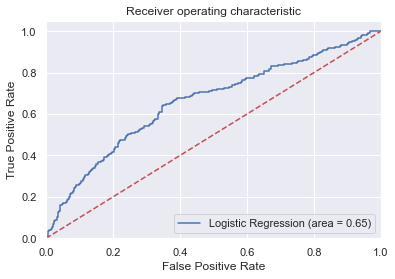

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

O ideal do ROC seria ficar mais longe possível da linha tracejada, visto que ela sinaliza um classificador totalmente randômico.